<a href="https://colab.research.google.com/github/GutemaG/Machine-Learning/blob/master/hand_written_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digits classification with tensorflow 2

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


## MNIST Dataset for handwritten recognition:
  * total dataset = 70k
      * Training dataset = 60k
      * testing dataset =10k
  * Each dataset contain 28x28 images
  

In [ ]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

trained_result:  5


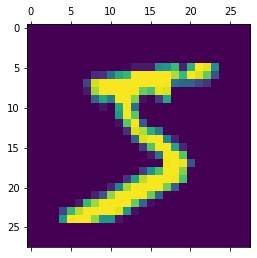

In [46]:
# Plot the first data from training dataset
print("trained_result: ",y_train[0])
plt.matshow(X_train[0])

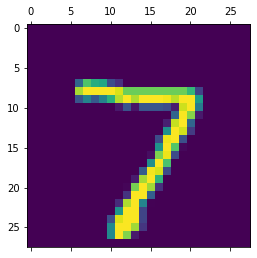

In [ ]:
# ploting from test dataset
plt.matshow(X_test[0]) 

In [ ]:
# y_training set contain only the following
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [50]:
#Flatten dataset:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print("X_train After flattened: ", X_train_flattened.shape)
print("X_test after flattened: ", X_test_flattened.shape)

X_train After flattened:  (60000, 784)
X_test after flattened:  (10000, 784)


### Create Model
1. use keras Sequential API
    * ``` Dense() ``` Every previous layer input is connected to the current layer. specify #of input and output layer.

In [58]:
model = keras.Sequential([
    keras.layers.Dense(units=784, activation='sigmoid'),
    keras.layers.Dense(units=10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
              )

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3754 - accuracy: 0.8952
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2804 - accuracy: 0.9186
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2488 - accuracy: 0.9262
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2320 - accuracy: 0.9310
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2191 - accuracy: 0.9349


In [65]:
# Evaluate model using test data
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2201 - accuracy: 0.9328


[0.22009292244911194, 0.9327999949455261]

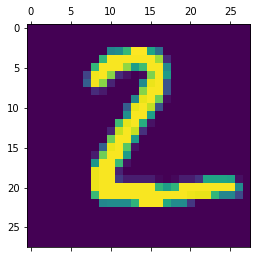

In [74]:
plt.matshow(X_test[1])

In [78]:
y_predict = model.predict(X_test_flattened)
y_predict[1] # the highst number is the preidcted value
# to get max element
np.argmax(y_predict[1])

2

In [85]:
# Create Confusion matrix(cm)
y_predicted_labels = [np.argmax(i) for i in y_predict]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    4,    0,    6,    6,    2,    3,    0],
       [   0, 1103,    4,    5,    3,    0,    4,    2,   12,    2],
       [   7,    0,  948,   26,   11,    0,    8,   13,   17,    2],
       [   2,    0,    4,  977,    3,    2,    0,    7,   11,    4],
       [   2,    0,    2,    0,  958,    0,    5,    1,    2,   12],
       [   9,    1,    2,   46,    9,  782,   11,    4,   20,    8],
       [  10,    3,    1,    0,   16,   12,  907,    2,    7,    0],
       [   1,    5,   16,    9,   15,    1,    0,  950,    1,   30],
       [   6,    1,    6,   50,   15,    6,    7,    4,  858,   21],
       [  10,    4,    1,   20,   71,    4,    0,    7,    5,  887]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

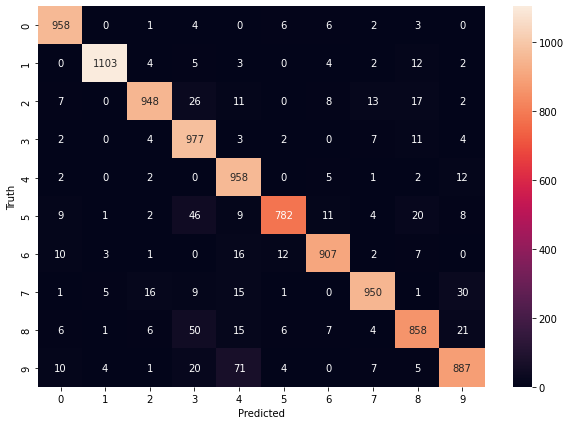

In [86]:
#using Seaborn for confusion matrix
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Build second model using Feature Scaling
* Each value in the dataset contain in range of 0-255. Then divide each by max value(255) to scale the value between(0 -1)

In [59]:
X_train2 = X_train/255
# y_train2 = y_train/255

X_train_flattened2 = X_train_flattened/255
X_test_flattened2 = X_test_flattened/255

In [64]:
model2 = keras.Sequential([
    keras.layers.Dense(784, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy']
               )
model2.fit(X_train_flattened2, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3324 - accuracy: 0.9042
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1672 - accuracy: 0.9510
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1063 - accuracy: 0.9689
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0732 - accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0528 - accuracy: 0.9844


In [98]:
loss, accuracy = model2.evaluate(X_test_flattened2,  y_test)
loss, accuracy

313/313 [==============================] - 2s 6ms/step - loss: 0.0757 - accuracy: 0.9769


(0.07568741589784622, 0.9768999814987183)

In [82]:
y2_predict = model2.predict(X_test_flattened2)
np.argmax(y2_predict[1])

2

Text(69.0, 0.5, 'Truth')

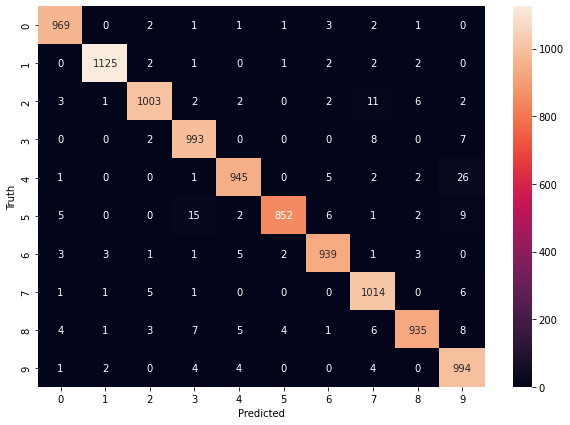

In [88]:
y_predicted_labels2 = [np.argmax(i) for i in y2_predict]
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels2)
plt.figure(figsize=(10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# using ```keras Faltten``` API for original input
* use relu activation function in hidden layer and sigmoid on ouptu layer


In [100]:
X_train3 = X_train/255
X_test3 = X_test/255
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model3.compile(optimizer='adam',
               loss=keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy']
               )

model3.fit(X_train3, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2586 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1138 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0806 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0628 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0495 - accuracy: 0.9841


In [102]:
loss, accuracy = model3.evaluate(X_test, y_test)
print("loss: ", loss, "accuracy: ", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 17.7440 - accuracy: 0.9723
loss:  17.743968963623047 accuracy:  0.9722999930381775
